# **TTI109 - Estatística**
# **Trabalho T2**
# **01 de novembro de 2023**

## Instruções:

*   Salve esse *notebook* com o nome "RA.ipynb", em que RA é o número de registro acadêmico do aluno que enviará a atividade no ambiente OPEN LMS.
*   Preencha corretamente os campos de identificação (nome completo e RA) e execute a célula de código que contém tais campos.
*   É permitida a consulta ao material da disciplina (OPEN-LMS).
*   É permitida a consulta ao GitHub pessoal.
*   A atividade consta de 4 questões:
    * Questão 01 - Valor 2,5 pontos (itens *a* até *e*).
    * Questão 02 - Valor 2,5 pontos (itens *a* até *d*).
    * Questão 03 - Valor 2,5 pontos (itens *a* até *d*).
    * Questão 04 - Valor 2,5 pontos (itens *a* até *c*).
*   Nas questões, grande parte do código já é fornecida. Preencha as lacunas `'Seu código aqui'` com sua solução.
*   Quando pertinente, responda às questões dissertativas nos campos a elas destinados e execute a célula de código que contém esses campos.

In [53]:
#@title Identificação
Nome_1 = "Felipe Costa Muniz" #@param {type:"string"}
RA_1 = "23.01459-8" #@param {type:"string"}


In [74]:
Nome_2 = "Lucas Kenzo Murakami Tada" #@param {type:"string"}
RA_2 = "23.01221-8" #@param {type:"string"}

In [54]:
#@title Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import norm

# Questão 01 - Análise de uma distribuição normal (2,5 pontos)

O tempo médio de sono (em horas) para um grupo de médicos residentes de um hospital pode ser aproximado por uma distribuição normal, como pode ser visto na figura a seguir. (Adaptado de: *National Institute of Occupational and Health, Japão.*).

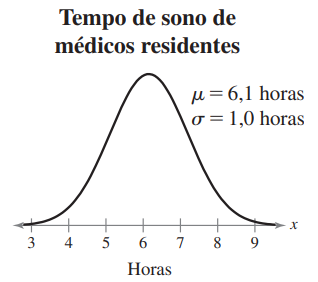

**a)** (0,5) Construa a distribuição normal dos tempos médios de sono, de acordo com o enunciado.

In [55]:
# Carcaterização da população
mu, sigma = 6.1, 1

# Geração da distribuição normal das distãncias de frenagem
tempo_sono = norm(loc=mu, scale=sigma)

**b)** (0,5) Qual tempo de sono representa o 15º percentil?

In [56]:
tempo = tempo_sono.ppf(0.15)
print(f'Tempo de sono do 15º percentil = {tempo:.2f} horas')

Tempo de sono do 15º percentil = 5.06 horas


**c)** (0,5) Qual tempo de sono representa o terceiro quartil?

In [57]:
tempo = tempo_sono.ppf(0.75)
print(f'Tempo de sono do terceiro quartil = {tempo:.2f} horas')

Tempo de sono do terceiro quartil = 6.77 horas


**d)** (0,5) Qual é o tempo de sono mais curto que ainda colocaria
um residente entre os 5% com mais tempo de sono?

In [58]:
tempo = tempo_sono.ppf(0.95) # ou 1-0.05
print(f'Menor tempo de sono entre os 5% com mais tempo de sono = {tempo:.2f} horas')

Menor tempo de sono entre os 5% com mais tempo de sono = 7.74 horas


**e)** (0,5) Entre quais dois valores encontram-se os 50% dos
tempos de sono centrais?

In [59]:
tempo1 = tempo_sono.ppf(0.25)
tempo2 = tempo_sono.ppf(0.75)
print(f'50% centrais dos tempos de sono entre {tempo1:.2f} e {tempo2:.2f} horas')

50% centrais dos tempos de sono entre 5.43 e 6.77 horas


# Questão 02 - Distribuição amostral das médias (2,5 pontos)

Uma máquina está regulada para encher latas de tinta com um desvio padrão de 0,1 kg. Uma amostra aleatória de 40 latas de tinta é selecionada aleatoriamente, com média de 3,625 kg.

**a)** (0,75) Construa a distribuição amostral dos valores médios das massas das latas de tinta.

In [60]:
# Carcaterização da população
mu, sigma = 3.625, 0.1

# Geração da distribuição das médias amostrais
amostras = 40
mu_x, std_x = mu, sigma / amostras**0.5
tintas = norm(mu_x, std_x)


**b)** (0,5) Qual é a probabilidade de que a máquina preencha uma lata de tinta com menos de 3,6 kg?

In [61]:
prob = tintas.cdf(3.6)
print(f'P(Lata de tinta < 3,6) = {prob*100:.2f}%')

P(Lata de tinta < 3,6) = 5.69%



**c)** (0,5) Qual é a probabilidade de que a máquina preencha uma lata de tinta com mais de 3,675 kg?

In [62]:
prob = tintas.sf(3.675)
print(f'P(Lata de tinta > 3.675) = {prob*100:.2f}%')

P(Lata de tinta > 3.675) = 0.08%



**d)** (0,75) Qual é a probabilidade de que a máquina preencha uma lata de tinta com massa entre 3,55 e 3,65 kg?

In [63]:
prob = tintas.cdf(3.65) - tintas.cdf(3.55)
print(f'P(3,55 < Lata de tinta < 3,65) = {prob*100:.2f}%')

P(3,55 < Lata de tinta < 3,65) = 94.31%


# Questão 03 - Intervalo de Confiança para a Média Populacional (2,5 pontos)

Um conselho de pesquisa quer estimar a duração média de tempo (em minutos) que um adulto americano gasta assistindo a vídeos no *smartphone* diariamente. Para determinar essa estuimativa, o conselho de pesquisa coleta uma amostra de 20 adultos e obtém os seguintes resultados:

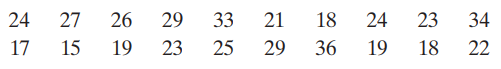

A célula abaixo registra essas informações na variável `dados`.

In [64]:
# Conjunto de dados
dados = pd.Series([24, 27, 26, 29, 33, 21, 18, 24, 23, 34,
                   17, 15, 19, 23, 25, 29, 36, 19, 18, 22])

**a)** (0,5) Suponha que o desvio padrão populacional $\sigma$ é de 4,3 minutos. Nessa condição, preencha o código da célula abaixo com as informações pertinentes ao problema.

In [65]:
# Estimativa pontual
x_barra = dados.mean()

# Desvio padrão populacional
sigma = 4.3

# Amostras
amostras = len(dados)

**b)** (0,75) Construa um intervalo de 95% de confiança para a média populacional $\mu$.

In [66]:
# Nível de confiança
confianca = 0.95

# Intervalo de confiança
mu_x, std_x = x_barra, sigma / amostras**0.5
IC1 = st.norm.interval(confidence=confianca, loc=x_barra, scale=std_x)
print(f'Sigma conhecido --> IC para média = ({IC1[0]:.2f}, {IC1[1]:.2f}) minutos')

Sigma conhecido --> IC para média = (22.22, 25.98) minutos


**c)** (0,75) Refaça o item anterior, admitindo que o desvio populacional $\sigma$ não é conhecido.

In [67]:
std_amostral = dados.std(ddof=1)/amostras**0.5
erro_padrao = st.sem(dados)
IC2 = st.t.interval(confidence=confianca, df = amostras-1, loc=x_barra, scale=std_amostral)
print(f'Sigma desconhecido --> IC para média = ({IC2[0]:.2f}, {IC2[1]:.2f}) minutos')

Sigma desconhecido --> IC para média = (21.35, 26.85) minutos


**d)** (0,5) Execute a célula a seguir e explique a diferença entre os comprimentos dos intervalos de confiança dos itens anteriores.

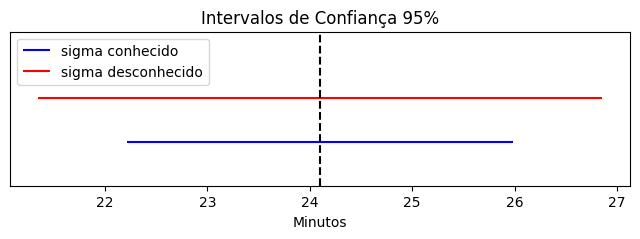

In [68]:
# Representação gráfica
plt.figure(figsize=(8,2))
plt.hlines(0.5, IC1[0], IC1[1], colors='b')
plt.hlines(1.0, IC2[0], IC2[1], colors='r')
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.ylim(0, 1.75)
plt.vlines(x_barra, 0, 1.75, colors='k', linestyles='dashed')
plt.title('Intervalos de Confiança 95%')
plt.xlabel('Minutos')
plt.legend(['sigma conhecido', 'sigma desconhecido'], loc='upper left')
plt.show()

In [69]:
#@title Resposta
Resp_Q3_d = 'E visivel que quando o desvio padrao e conhecido o comprimento de seu intervalo de confianca e bem menor' #@param {type:"string"}
display(Resp_Q3_d)

'E visivel que quando o desvio padrao e conhecido o comprimento de seu intervalo de confianca e bem menor'

# Questão 04 - Intervalo de Confiança para a Variância e Desvio Padrão (2,5 pontos)

Os volumes (em onças fluidas) do conteúdo de 15 frascos de xarope para tosse selecionados aleatoriamente estão listados abaixo.

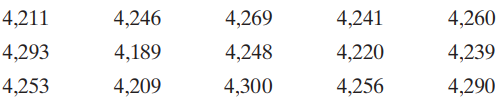

In [70]:
# Conjunto de dados
volumes = pd.Series([4.211, 4.246, 4.269, 4.241, 4.260,
                     4.293, 4.189, 4.248, 4.220, 4.239,
                     4.253, 4.209, 4.300, 4.256, 4.290])

**a)** (1,0) Complete a célula a seguir com as características da distribuição das capacidades de reserva e a correspondente distribuição chi-quadrado.

In [71]:
# Caracterização da distribuição
amostras = len(volumes)
s_amostral = volumes.std(ddof=1)

# Distribuição chi-quadrado
distchi2 = st.chi2(df=amostras-1)

**b)** (1,0) Use um nível de confiança de 90% e construa um intervalo de confiança para a variância populacional.

In [72]:
# Nível de confiança
confianca = 0.9

# Determinação dos valores críticos
x2L = distchi2.ppf((1-confianca)/2)
x2R = distchi2.ppf((1+confianca)/2)

# Extremos do IC para variância
inf_var = (amostras-1)*s_amostral**2/x2R
sup_var = (amostras-1)*s_amostral**2/x2L

# Exibição do resultado
print(f'IC para a variância = ({inf_var:.5f}, {sup_var:.6f}) onças fluidas^2')

IC para a variância = (0.00061, 0.002200) onças fluidas^2


**c)** (0,5) Use um nível de confiança de 95% e construa um intervalo de confiança para a desvio padrão populacional.

In [73]:
# Extremos do IC para o desvio padrão
inf_std = inf_var**0.5
sup_std = sup_var**0.5

# Exibição do resultado
print(f'IC para o desvio padrão = ({inf_std:.4f}, {sup_std:.4f}) onças fluidas')

IC para o desvio padrão = (0.0247, 0.0469) onças fluidas
